In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

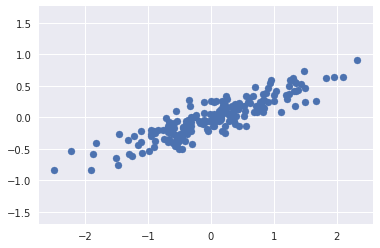

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [4]:
np.dot?

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(-2.740770608255631,
 2.581773841963696,
 -0.9503241913662931,
 1.0221198640776008)

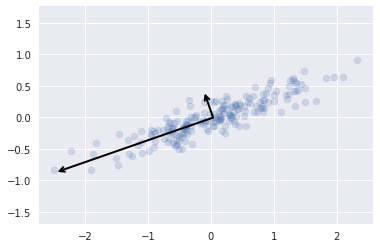

In [6]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal')

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)


In [8]:
X_pca

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

(-2.78030489102931, 2.670533706929767, -1.0014180896959421, 1.024552906855203)

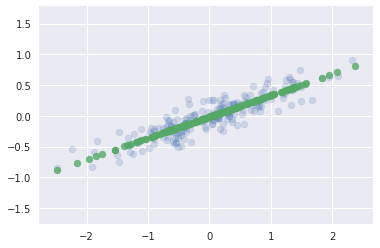

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [41]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


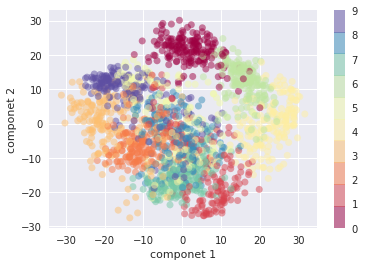

In [42]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('componet 1')
plt.ylabel('componet 2')
plt.colorbar();

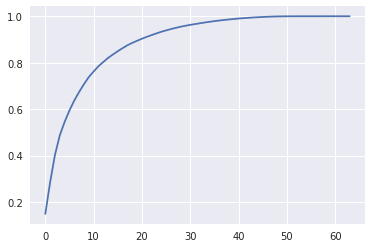

In [44]:
pca = PCA().fit(digits.data)
pca.components_[0].shape
plt.plot(np.cumsum(pca.explained_variance_ratio_))

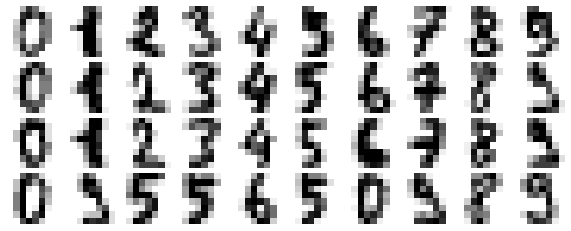

In [37]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap='binary',interpolation='nearest',
                  clim=(0,16))
plot_digits(digits.data)

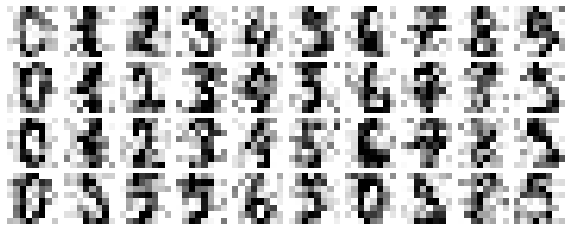

In [38]:
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [39]:
pca=PCA(0.5).fit(noisy)
pca.components_[0].shape

(64,)

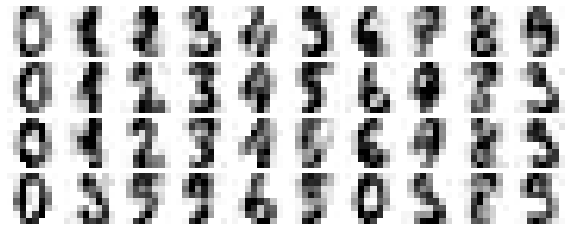

In [25]:
componets = pca.transform(noisy)
filtered = pca.inverse_transform(componets)
plot_digits(filtered)

In [45]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)


In [46]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

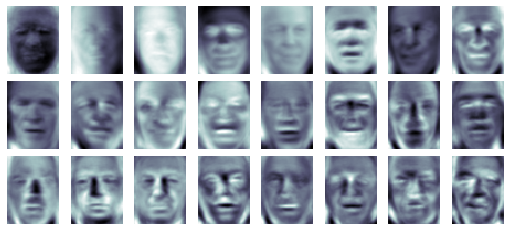

In [47]:
fig, axes = plt.subplots(3,8,figsize=(9,4),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

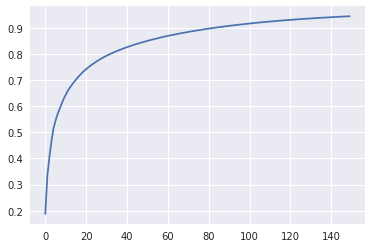

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [50]:
pca?

In [34]:
faces.data[0].shape

(2914,)